In [1]:
import os
os.path

from datetime import datetime, timedelta
import cmocean

import pyproj
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import trajan as ta
import pandas as pd

import opendrift
from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_netCDF_CF_generic
from opendrift.models.physics_methods import wind_drift_factor_from_trajectory, distance_between_trajectories, skillscore_liu_weissberg

import cartopy.crs as ccrs
from matplotlib.lines import Line2D

from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [2]:
ag_area_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_area_back.out')
ag_area_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_area_forward.out')
ag_sepdis_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_sepdis_fwd.out')
ag_sepdis_back_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_sepdis_back.out')
ag_msd_hits = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_msd_fwd.out')
ag_msd_hits_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_msd_back.out')
ag_n = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_n.out')

In [3]:
rf_area_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_area_back.out')
rf_area_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_area_forward.out')
rf_sepdis_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_sepdis_fwd.out')
rf_sepdis_back_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_sepdis_back.out')
rf_msd_hits = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_msd_fwd.out')
rf_msd_hits_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_msd_back.out')
rf_n = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_n.out')

In [4]:
rt_area_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_area_back.out')
rt_area_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_area_forward.out')
rt_sepdis_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_sepdis_fwd.out')
rt_sepdis_back_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_sepdis_back.out')
rt_msd_hits = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_msd_fwd.out')
rt_msd_hits_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_msd_back.out')
rt_n = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_n.out')

In [5]:
ed_area_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_area_back.out')
ed_area_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_area_forward.out')
ed_sepdis_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_sepdis_fwd.out')
ed_sepdis_back_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_sepdis_back.out')
ed_msd_hits = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_msd_fwd.out')
ed_msd_hits_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_msd_back.out')
ed_n = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_n.out')

In [6]:
msd_forward = np.concatenate([ag_msd_hits, rf_msd_hits, rt_msd_hits, ed_msd_hits])
msd_back = np.concatenate([ag_msd_hits_back, rf_msd_hits_back, rt_msd_hits_back, ed_msd_hits_back])

msd_back = np.array(msd_back)[~np.isnan(np.array(msd_back))]
msd_forward = np.array(msd_forward)[~np.isnan(np.array(msd_forward))]

In [7]:
sd_forward = np.concatenate([ag_sepdis_fwd_new, rf_sepdis_fwd_new, rt_sepdis_fwd_new, ed_sepdis_fwd_new])
sd_back = np.concatenate([ag_sepdis_back_new, rf_sepdis_back_new, rt_sepdis_back_new, ed_sepdis_back_new])

sd_back = np.array(sd_back)[~np.isnan(np.array(sd_back))]
sd_forward = np.array(sd_forward)[~np.isnan(np.array(sd_forward))]

In [8]:
area_forward = np.concatenate([ag_area_fwd_new, rf_area_fwd_new, rt_area_fwd_new, ed_area_fwd_new])
area_back = np.concatenate([ag_area_back, rf_area_back, rt_area_back, ed_area_back])

area_back = np.array(area_back)[~np.isnan(np.array(area_back))]
area_forward = np.array(area_forward)[~np.isnan(np.array(area_forward))]

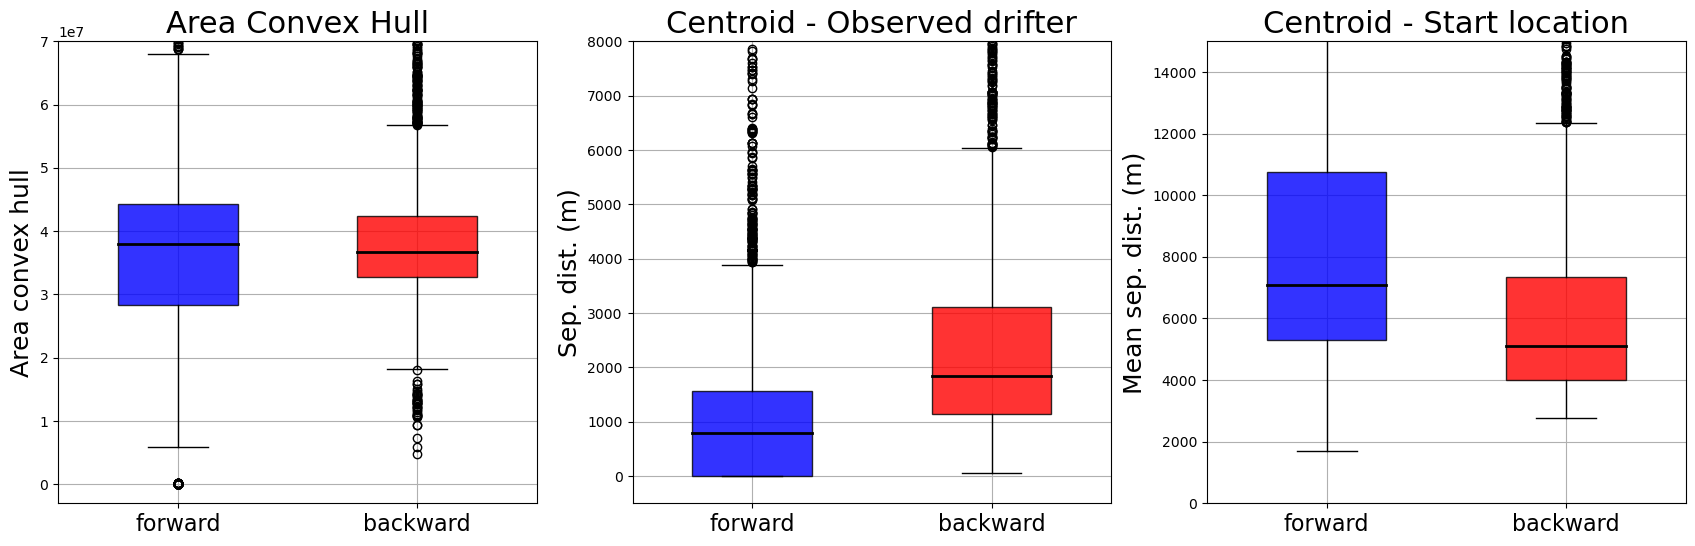

In [10]:
plt.figure(figsize=(21,6))

plt.subplot(1,3,1)
plt.boxplot(area_back, positions=[2], patch_artist=True, boxprops=dict(facecolor='red', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.boxplot(area_forward, positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.xticks([1,2],['forward', 'backward'], fontsize=16)
plt.ylabel('Area convex hull', fontsize=18)
plt.ylim([-0.03e8,0.7e8])
plt.title('Area Convex Hull', fontsize=22)
plt.grid()

plt.subplot(1,3,2)
plt.boxplot(sd_back, positions=[2], patch_artist=True, boxprops=dict(facecolor='red', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.boxplot(sd_forward, positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.xticks([1,2],['forward', 'backward'], fontsize=16)
plt.ylabel('Sep. dist. (m)', fontsize=18)
plt.title('Centroid - Observed drifter', fontsize=22)
plt.ylim([-500,8000])
plt.grid()

plt.subplot(1,3,3)
plt.boxplot(msd_back, positions=[2], patch_artist=True, boxprops=dict(facecolor='red', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.boxplot(msd_forward, positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.xticks([1,2],['forward', 'backward'], fontsize=16)
plt.ylabel('Mean sep. dist. (m)', fontsize=18)
plt.title('Centroid - Start location', fontsize=22)
plt.ylim([0,15000])
plt.grid()